In [4]:
import sys, os, os.path
if not 'EXPERIMENT_HOME' in os.environ: # Configure local paths if not already defined
    ML_HOME = os.path.abspath(os.path.join("..", "ml_home")) # ML workspace
    EXPERIMENT_HOME = os.path.abspath(os.path.join(ML_HOME, "..")) # Experiment workspace
    DATA_HOME = os.path.abspath(os.path.join(EXPERIMENT_HOME,"dataset")) # Dataset location
    os.environ["EXPERIMENT_HOME"] = EXPERIMENT_HOME
    os.environ["DATA_HOME"] = DATA_HOME
    sys.path.insert(0, EXPERIMENT_HOME)
    sys.path.insert(0, ML_HOME) # Add to path so can load our library
    os.chdir(EXPERIMENT_HOME) # Change working directory to experiment workspace
print("Experiment Home: ", os.path.abspath(os.curdir), "; Data Home:", DATA_HOME)

Experiment Home:  /home/jovyan ; Data Home: /home/jovyan/dataset


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Test

# from data.pilot import build_pilot_dataset
# df_stocks, df_indices = build_pilot_dataset()

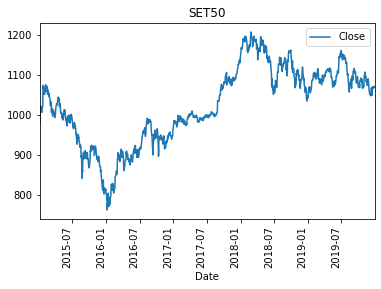

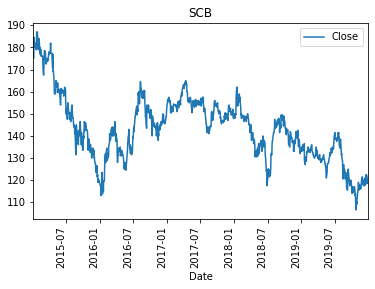

In [7]:
# Usage:
from data.pilot import load_pilot_series

dataset = load_pilot_series()

dataset.keys()

dataset['SET50'][['Close']].plot(title='SET50', rot=90)
dataset['SCB'][['Close']].plot(title='SCB', rot=90)


In [8]:
# Extract period from historical/
from dataset import Yr2014, Yr2020, Yr2019
from data.src import stockdata_fetch_local

In [9]:

from data.src import stockdata_fetch_local


In [10]:
from data.pilot import get_pilot_stocks
df_stocks = get_pilot_stocks()

tbl = df_stocks.pivot_table(values='Close', index='Date', columns=['Industry', 'Sector', 'Ticker'])
tbl

Industry      Banking        Energy & Utilities             Food & Beverage  \
Sector     Financials                 Resources        Agro & Food Industry   
Ticker          KBANK    SCB                PTT  RATCH                  CPF   
Date                                                                          
2015-01-05      220.0  179.0          31.500000  59.50                27.25   
2015-01-06      214.0  175.0          32.299999  58.75                26.50   
2015-01-07      218.0  178.0          33.400002  59.00                26.75   
2015-01-08      228.0  182.0          34.000000  59.50                26.75   
2015-01-09      229.0  184.5          33.799999  59.00                27.00   
...               ...    ...                ...    ...                  ...   
2019-12-24      148.0  118.5          44.250000  69.00                27.75   
2019-12-25      151.0  119.5          44.250000  69.50                27.75   
2019-12-26      150.0  119.0          44.500000  69.00                27.75   
2019-12-27      150.0  119.5          44.250000  69.50                27.50   
2019-12-30      151.0  122.0          44.000000  68.75                27.50   

Industry               Property Development       Transportation & Logistics  \
Sector              Property & Construction                         Services   
Ticker          KSL                      AP    LH                        AOT   
Date                                                                           
2015-01-05  5.31818                    5.95  9.00                  27.299999   
2015-01-06  5.31818                    5.90  8.85                  27.200001   
2015-01-07  5.31818                    6.00  9.00                  28.299999   
2015-01-08  5.31818                    6.20  9.15                  28.900000   
2015-01-09  5.31818                    6.20  9.10                  29.100000   
...             ...                     ...   ...                        ...   
2019-12-24  2.18000                    6.90  9.70                  73.250000   
2019-12-25  2.16000                    7.00  9.75                  74.000000   
2019-12-26  2.18000                    7.35  9.70                  74.750000   
2019-12-27  2.18000                    7.35  9.75                  74.250000   
2019-12-30  2.24000                    7.45  9.80                  74.250000   

Industry           
Sector             
Ticker        BTS  
Date               
2015-01-05   9.55  
2015-01-06   9.85  
2015-01-07   9.90  
2015-01-08   9.95  
2015-01-09   9.95  
...           ...  
2019-12-24  13.10  
2019-12-25  13.20  
2019-12-26  13.20  
2019-12-27  13.20  
2019-12-30  13.20  

[1219 rows x 10 columns]

Text(0.5, 1.0, 'Pilot Data Set: Stocks')

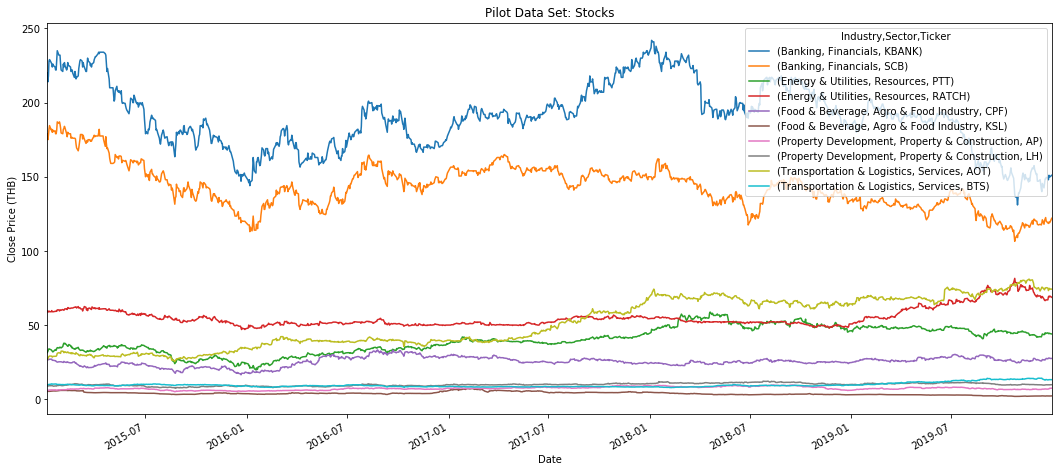

In [20]:
tbl.plot(figsize=(18,8))
plt.ylabel('Close Price (THB)')
plt.title("Pilot Data Set: Stocks")

# Get Indices Data

In [12]:
from data.src import indexdata_fetch_local, read_csv_from_historical_folder

In [13]:
indices = ["SET","SET50","SET100"]
df_indices = indexdata_fetch_local(Yr2014.dt_end, Yr2019.dt_end, ["SET","SET50","SET100"])
df_indices

,Price,Open,High,Low,Vol.,Change %,Close,Volume,Date,Ticker
0,"1,483.25",1499.70,1502.10,1482.87,7.13B,-0.96,1483.25,7.130000e+09,2015-01-05,SET
1,"1,477.58",1467.97,1478.35,1459.22,31.34B,-0.38,1477.58,3.134000e+10,2015-01-06,SET
2,"1,500.75",1478.84,1500.83,1478.26,12.40B,1.57,1500.75,1.240000e+10,2015-01-07,SET
3,"1,521.62",1514.90,1523.32,1514.18,18.00B,1.39,1521.62,1.800000e+10,2015-01-08,SET
4,"1,529.42",1529.50,1531.21,1522.75,32.28B,0.51,1529.42,3.228000e+10,2015-01-09,SET
...,...,...,...,...,...,...,...,...,...,...
3655,"2,331.24",2342.41,2345.18,2328.64,1.59B,-0.39,2331.24,1.590000e+09,2019-12-24,SET100
3656,"2,337.13",2326.72,2340.71,2323.98,909.04M,0.25,2337.13,9.090400e+08,2019-12-25,SET100
3657,"2,344.83",2338.75,2347.20,2336.55,1.27B,0.33,2344.83,1.270000e+09,2019-12-26,SET100
3658,"2,342.05",2353.21,2360.24,2323.01,1.49B,-0.12,2342.05,1.490000e+09,2019-12-27,SET100


In [14]:
df_indices[df_indices['Ticker']=='SET50']

,Price,Open,High,Low,Vol.,Change %,Close,Volume,Date,Ticker
1220,987.40,1002.19,1003.83,986.94,674.13M,-1.36,987.40,6.741300e+08,2015-01-05,SET50
1221,980.50,974.75,981.66,967.74,1.05B,-0.70,980.50,1.050000e+09,2015-01-06,SET50
1222,998.05,980.88,998.10,980.18,784.32M,1.79,998.05,7.843200e+08,2015-01-07,SET50
1223,"1,013.24",1009.68,1015.52,1008.11,1.07B,1.52,1013.24,1.070000e+09,2015-01-08,SET50
1224,"1,017.87",1018.89,1019.91,1013.03,813.37M,0.46,1017.87,8.133700e+08,2015-01-09,SET50
...,...,...,...,...,...,...,...,...,...,...
2435,"1,065.23",1070.38,1071.83,1063.74,1.27B,-0.40,1065.23,1.270000e+09,2019-12-24,SET50
2436,"1,067.99",1062.79,1069.60,1061.32,591.91M,0.26,1067.99,5.919100e+08,2019-12-25,SET50
2437,"1,070.74",1068.57,1071.84,1066.53,752.04M,0.26,1070.74,7.520400e+08,2019-12-26,SET50
2438,"1,068.72",1074.67,1077.51,1059.21,1.03B,-0.19,1068.72,1.030000e+09,2019-12-27,SET50


In [15]:
# indices['SET50'] = df_indices[df_indices['Ticker']=='SET50']
# indices['SET100'] = df_indices[df_indices['Ticker']=='SET100']
#  indices['SET'].index = pd.to_datetime(indices['SET']['Date'])
# indices['SET']

In [16]:
symbols = indices
df = pd.DataFrame()
indices = {}
for i in symbols:
    indices[i] = df_indices[df_indices['Ticker']==i]
    indices[i].index = pd.to_datetime(indices[i]['Date'])
    df = pd.concat([df, indices[i]])

# indices

In [17]:
""" From 10-stock_QP.ipynb
df = pd.DataFrame()
dataset = {}
for s in stocks:
    try:
        data = pdr.get_data_yahoo('%s.BK' % s,start=start,end=end)
        data['ticker'] = s # add ticker to column
        data['adj_close'] = data['Adj Close']
        dataset[s] = data[['ticker', 'adj_close']] # Need two columns
        df = pd.concat([df, dataset[s]])
    except Exception as e:
        print("Error: %s %s" % (s, str(e)))
"""

table = df.pivot(columns='Ticker')['Price'] # Pivot table
table

Ticker,SET,SET100,SET50
Date,,,
2015-01-05,"1,483.25","2,184.80",987.40
2015-01-06,"1,477.58","2,172.92",980.50
2015-01-07,"1,500.75","2,211.95",998.05
2015-01-08,"1,521.62","2,246.20","1,013.24"
2015-01-09,"1,529.42","2,256.59","1,017.87"
...,...,...,...
2019-12-24,"1,568.63","2,331.24","1,065.23"
2019-12-25,"1,573.00","2,337.13","1,067.99"
2019-12-26,"1,579.03","2,344.83","1,070.74"


Text(0.5, 1.0, 'Pilot Data Set: Stock Indices')

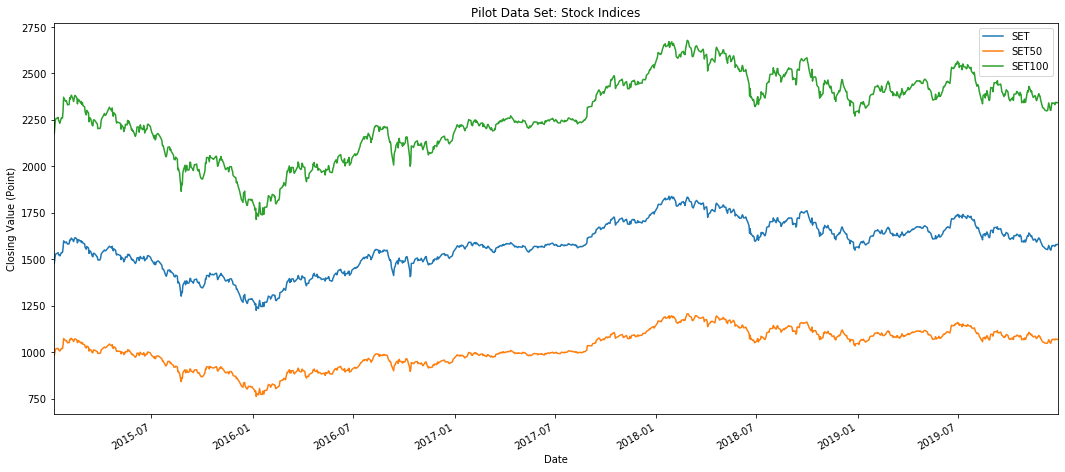

In [19]:
fig, ax = plt.subplots()
for si in indices:
    a = indices[si][['Close']].plot(ax=ax, legend=False, figsize=(18, 8))
ax.legend(indices.keys())
plt.ylabel('Closing Value (Point)')
plt.title("Pilot Data Set: Stock Indices")

# Merge two Pivot tables

In [ ]:
tbl_index = df_indices.pivot_table(values='Close', index='Date', columns=['Ticker'])
tbl_index

In [ ]:
tbl_stock = df_stocks.pivot_table(values='Close', index='Date', columns=['Ticker'])
tbl_stock

# Apply frequency 'day' to both frames and see the NaN data point

In [ ]:
tbl_stock.index
tbl_stock.asfreq('d')

In [ ]:
tbl_index.asfreq('d')

# There is some missing data

The index counts for two data frames are not aligned.

In [ ]:
tbl_index.index.difference(tbl_stock.index)

### 2017-01-13

In [ ]:
tbl_stock['2017-01-12':'2017-01-14']

In [ ]:
tbl_index['2017-01-12':'2017-01-14']

### 2017-05-05

In [ ]:
tbl_stock['2017-05-04':'2017-05-06']

In [ ]:
tbl_index['2017-05-04':'2017-05-06']

In [ ]:
## 

tbl_stock.index.difference(tbl_index.index)

### 2015-05-04

In [ ]:
tbl_stock['2015-05-03':'2015-05-05']

In [ ]:
tbl_index['2015-05-03':'2015-05-05']

In [ ]:
tbl_stock.plot(figsize=(18,8))

In [ ]:
tbl_stock.columns

In [ ]:
tbl_index.columns

In [ ]:
PILOT_DATA_HOME = os.path.join(DATA_HOME, 'pilot.data')


def write_piot_series(ticker, dataframe, folder=PILOT_DATA_HOME):
    dataframe.to_csv(os.path.join(folder,'%s.csv' % ticker))
    print("Wrote: %s pilot data series with %s observations." % (ticker, len(dataframe)))
    return dataframe

# For each stock, 
# for i in symbols:
#     indices[i] = df_indices[df_indices['Ticker']==i]

os.listdir(PILOT_DATA_HOME)

tbl_stock.columns[1]

In [ ]:
for ticker in tbl_stock.columns:
    df_series = df_stocks[df_stocks['Ticker']==ticker]
    df_series.index = pd.to_datetime(df_series['Date'])
    write_piot_series(ticker, df_series)


In [ ]:
for ticker in tbl_index.columns:
    df_series = df_indices[df_indices['Ticker']==ticker]
    df_series.index = pd.to_datetime(df_series['Date'])
    write_piot_series(ticker, df_series)

In [ ]:
# Check pilot data folder
os.listdir(PILOT_DATA_HOME)

In [22]:
PILOT_DATA_HOME = os.path.join(DATA_HOME, 'pilot.data')
os.listdir(PILOT_DATA_HOME)

['AOT.csv',
 'AP.csv',
 'BTS.csv',
 'CPF.csv',
 'KBANK.csv',
 'KSL.csv',
 'LH.csv',
 'PTT.csv',
 'RATCH.csv',
 'SCB.csv',
 'SET.csv',
 'SET100.csv',
 'SET50.csv',
 'ticker.list']

# Prepare Statistics for Summary

In [23]:
ticker_list = pd.DataFrame(dataset.keys(), columns=['Ticker'])

ticker_list.to_csv(os.path.join(PILOT_DATA_HOME,'ticker.list'), header=False)

ticker_list

,Ticker
0,AOT
1,AP
2,BTS
3,CPF
4,KBANK
5,KSL
6,LH
7,PTT
8,RATCH
9,SCB


In [24]:
from data.pilot import get_pilot_indices

df_indices = get_pilot_indices()
tbl_index = df_indices.pivot_table(values='Close', index='Date', columns=['Ticker'])

tbl_index.describe().T[['count','mean','std']]

,count,mean,std
Ticker,,,
SET,1220.0,1573.443500,131.171925
SET100,1220.0,2277.210320,209.162121
SET50,1220.0,1022.889516,97.049547


In [25]:
from data.pilot import get_pilot_stocks

df_stocks = get_pilot_stocks()

pd.DataFrame(df_stocks.columns.values).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,High,Low,Open,Close,Volume,Adj Close,Date,Ticker,Sector,Industry,DailyReturn,DailyPriceVariation,PriceStDev-5d


In [26]:
tbl_stock = df_stocks.pivot_table(values='Close', index='Date', columns=['Industry','Ticker'])
tbl_stock.describe().T[['count','mean','std']]

count        mean        std
Industry                   Ticker                               
Banking                    KBANK   1219.0  190.546760  22.184956
                           SCB     1219.0  143.301477  14.986309
Energy & Utilities         PTT     1219.0   39.944012   8.827818
                           RATCH   1219.0   55.308039   6.476952
Food & Beverage            CPF     1219.0   25.421165   3.093084
                           KSL     1219.0    3.914794   1.037321
Property Development       AP      1219.0    7.307096   1.036955
                           LH      1219.0    9.884413   0.962428
Transportation & Logistics AOT     1219.0   51.197457  16.544097
                           BTS     1219.0    9.579861   1.487237

In [27]:

tbl_stock = df_stocks.pivot_table(values='DailyReturn', index='Date', columns=['Industry','Ticker'])
tbl_stock.describe().T[['count','mean','std']]

count      mean       std
Industry                   Ticker                            
Banking                    KBANK   1219.0  0.000342  0.014750
                           SCB     1219.0  0.000328  0.014253
Energy & Utilities         PTT     1219.0 -0.000251  0.016748
                           RATCH   1219.0 -0.000129  0.010348
Food & Beverage            CPF     1219.0 -0.000007  0.017997
                           KSL     1219.0  0.000716  0.020884
Property Development       AP      1219.0 -0.000184  0.017454
                           LH      1219.0 -0.000065  0.014488
Transportation & Logistics AOT     1219.0 -0.000794  0.013938
                           BTS     1219.0 -0.000257  0.011233

In [28]:
tbl_stock = df_stocks.pivot_table(values='DailyPriceVariation', index='Date', columns=['Industry','Ticker'])
tbl_stock.describe().T[['count','mean','std']]

count      mean       std
Industry                   Ticker                            
Banking                    KBANK   1219.0  0.017773  0.008782
                           SCB     1219.0  0.017674  0.008343
Energy & Utilities         PTT     1219.0  0.019079  0.009996
                           RATCH   1219.0  0.014953  0.008475
Food & Beverage            CPF     1219.0  0.024826  0.011992
                           KSL     1219.0  0.024797  0.017568
Property Development       AP      1219.0  0.025363  0.012563
                           LH      1219.0  0.022130  0.010860
Transportation & Logistics AOT     1219.0  0.017942  0.010775
                           BTS     1219.0  0.016667  0.008154

In [29]:
tbl_stock = df_stocks.pivot_table(values='PriceStDev-5d', index='Date', columns=['Industry','Ticker'])
tbl_stock.describe().T[['count','mean','std']]

count      mean       std
Industry                   Ticker                            
Banking                    KBANK   1219.0  2.402909  1.398210
                           SCB     1219.0  1.701185  0.995610
Energy & Utilities         PTT     1219.0  0.521836  0.339826
                           RATCH   1219.0  0.465348  0.358120
Food & Beverage            CPF     1219.0  0.371629  0.226520
                           KSL     1219.0  0.067267  0.067863
Property Development       AP      1219.0  0.104064  0.057971
                           LH      1219.0  0.114355  0.066236
Transportation & Logistics AOT     1219.0  0.561897  0.395831
                           BTS     1219.0  0.086228  0.058231

In [3]:
from data.pilot import build_pilot_dataset
build_pilot_dataset()

(         High     Low    Open   Close      Volume   Adj Close       Date  \
 0      181.50  179.00  181.00  179.00   5752000.0  138.838455 2015-01-05   
 1      176.50  173.50  176.00  175.00  10430400.0  135.735931 2015-01-06   
 2      179.00  175.00  175.50  178.00   4456700.0  138.062836 2015-01-07   
 3      182.00  180.00  181.00  182.00   3963800.0  141.165359 2015-01-08   
 4      184.50  182.00  183.00  184.50   4298800.0  143.104462 2015-01-09   
 ...       ...     ...     ...     ...         ...         ...        ...   
 12185   69.75   67.00   67.25   69.00   7883900.0   67.580246 2019-12-24   
 12186   70.00   69.00   69.00   69.50   3154500.0   68.069962 2019-12-25   
 12187   69.75   68.75   69.75   69.00   2904300.0   67.580246 2019-12-26   
 12188   69.75   68.75   69.00   69.50   4584900.0   68.069962 2019-12-27   
 12189   69.50   68.25   69.50   68.75   4775700.0   67.335388 2019-12-30   
 
       Ticker      Sector            Industry  DailyReturn  \
 0        SC